# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2019 - II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código como celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

### Primer integrante:
Nombre: Jorge Hiler Ricardo


#### Segundo integrante:

Nombre: Santiago Gaviria Zapata


In [1]:
import numpy as np
import numpy.matlib as npMatlib
import matplotlib.pyplot as plt
import pandas as pd
#from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

train = pd.read_csv(r'DB/train.csv')

test = pd.read_csv(r'DB/test.csv')

naTrainResultantColumns = train.columns[train.isna().any()].tolist()
naTestColumns = test.columns[test.isna().any()].tolist()
print(naTrainResultantColumns)
print(naTestColumns)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
['MSZoning', 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


## Ejercicio 1: Contextualización del problema

El problema de *regresión* que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [2]:


def fillNAs(train, test):
    naTrainColumns = train.columns[train.isna().any()].tolist()
    train[naTrainColumns[0]].fillna(train[naTrainColumns[0]].mean(), inplace = True)
    train[naTrainColumns[1]].fillna('None', inplace = True)
    train[naTrainColumns[2]].fillna(train[naTrainColumns[2]].mean(), inplace = True)
    train[naTrainColumns[3]].fillna('NA', inplace = True)
    train[naTrainColumns[4]].fillna('NA', inplace = True)
    train[naTrainColumns[5]].fillna('NA', inplace = True)
    train[naTrainColumns[6]].fillna('NA', inplace = True)
    train[naTrainColumns[7]].fillna('NA', inplace = True)
    train[naTrainColumns[8]].fillna('SBrkr', inplace = True)
    train[naTrainColumns[9]].fillna('NA', inplace = True)
    train[naTrainColumns[10]].fillna('NA', inplace = True)
    train[naTrainColumns[11]].fillna(train[naTrainColumns[11]].mean(), inplace = True)
    train[naTrainColumns[12]].fillna('NA', inplace = True)
    train[naTrainColumns[13]].fillna('NA', inplace = True)
    train[naTrainColumns[14]].fillna('NA', inplace = True)
    
    naTrainResultantColumns = train.columns[train.isna().any()].size
    print('Numero de columnas con valores NA: ', naTrainResultantColumns)
    
    naTestColumns = test.columns[test.isna().any()].tolist()
    
    test[naTestColumns[0]].fillna('RL', inplace = True)
    test[naTestColumns[1]].fillna(test[naTestColumns[1]].mean(), inplace = True)
    test[naTestColumns[2]].fillna('None', inplace = True)
    test[naTestColumns[3]].fillna(test[naTestColumns[3]].mean(), inplace = True)
    test[naTestColumns[4]].fillna('NA', inplace = True)
    test[naTestColumns[5]].fillna('NA', inplace = True)
    test[naTestColumns[6]].fillna('NA', inplace = True)
    test[naTestColumns[7]].fillna('NA', inplace = True)
    test[naTestColumns[8]].fillna(test[naTestColumns[8]].mean(), inplace = True)
    test[naTestColumns[9]].fillna('NA', inplace = True)
    test[naTestColumns[10]].fillna(test[naTestColumns[10]].mean(), inplace = True)
    test[naTestColumns[11]].fillna(test[naTestColumns[11]].mean(), inplace = True)
    test[naTestColumns[12]].fillna(test[naTestColumns[12]].mean(), inplace = True)
    test[naTestColumns[13]].fillna(test[naTestColumns[13]].mean(), inplace = True)
    test[naTestColumns[14]].fillna(test[naTestColumns[14]].mean(), inplace = True)
    test[naTestColumns[15]].fillna('NA', inplace = True)
    test[naTestColumns[16]].fillna('NA', inplace = True)
    test[naTestColumns[17]].fillna(test[naTestColumns[17]].mean(), inplace = True)
    test[naTestColumns[18]].fillna('NA', inplace = True)
    test[naTestColumns[19]].fillna(round(float(test[naTestColumns[19]].mean()), 1), inplace = True)
    test[naTestColumns[20]].fillna(test[naTestColumns[20]].mean(), inplace = True)
    test[naTestColumns[21]].fillna('NA', inplace = True)
    test[naTestColumns[22]].fillna('NA', inplace = True)
    
    naTestResultantColumns = train.columns[train.isna().any()].size
    print('Numero de columnas con valores NA: ', naTestResultantColumns)
    
    if (naTrainResultantColumns == 0 & naTestResultantColumns == 0):
        return print("Lllenado de campos vacíos completado")
    else: 
        return print("Llenado de campos vacíos erróneo")

fillNAs(train, test)


Numero de columnas con valores NA:  0
Numero de columnas con valores NA:  0
Lllenado de campos vacíos completado


#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




In [3]:

#Deleted columns 'cause had a lot of NA > 80%: 'Alley','Fence','MiscFeature','PoolQC'
#Deleted columns 'cause the std = 0: 'Utilities' %rep = 1, 'Street' %rep =1,
#'LandSlope' %rep = 0.95, Condition2 %rep = 1445/1460, RoofMatl %rep = 1434/1460, 
# Heating %rep = 1428/1460, LowQualFinSF %rep = 1436/1460, 
# PoolArea %rep = 1454/1460, 3SsnPorch %rep = 1438/1460

def deleteColumns(train, test):
    columnsToDelete = ['Id','Utilities','Street','LandSlope', 'Condition2', 'RoofMatl',  'Heating', 'LowQualFinSF', 'PoolArea', '3SsnPorch']
    train.drop(labels = columnsToDelete, axis = 1, inplace = True)
    test.drop(labels = columnsToDelete, axis = 1, inplace = True)
    
deleteColumns(train, test)

1.2 Cuántas caracteristicas tiene el problema?: 



In [4]:

def mergeTrainAndTest(train, test):
    trainToMerge = train.copy()
    Ytrain = trainToMerge['SalePrice'] 
    trainToMerge.drop(labels = 'SalePrice', axis = 1, inplace = True)
    trainToMerge['Set'] = 'train'
    testToMerge = test.copy()
    testToMerge['Set'] = 'test'
    db = trainToMerge.copy()
    db = db.append(testToMerge)
    return db, Ytrain

def convertToCategories(db):
    db['MSSubClass'] = db['MSSubClass'].astype('category')
    db["ExterQual"] = db["ExterQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["ExterCond"] = db["ExterCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["BsmtQual"] = db["BsmtQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["BsmtCond"] = db["BsmtCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["BsmtExposure"] = db["BsmtExposure"].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
    db["HeatingQC"] = db["HeatingQC"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["KitchenQual"] = db["KitchenQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["FireplaceQu"] = db["FireplaceQu"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["GarageQual"] = db["GarageQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["GarageCond"] = db["GarageCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    for i in db.select_dtypes(include='object').columns.to_list():
        db[i] = db[i].astype('category')
        
def oneHotEncoding(db):
    typeOfSet = db['Set']
    db.drop(labels = 'Set', axis = 1, inplace = True)
    featuresToEncode = db.select_dtypes(include='category').head().columns.values.tolist()
    resultantDB = pd.get_dummies(db, columns = featuresToEncode, drop_first= True)
    resultantDB = pd.concat([resultantDB, typeOfSet], axis=1)
    return resultantDB

db, Ytrain = mergeTrainAndTest(train, test)
convertToCategories(db)

db = oneHotEncoding(db)

db.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912 entries, 0 to 1451
Data columns (total 204 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   LotFrontage            float64 
 1   LotArea                int64   
 2   OverallQual            int64   
 3   OverallCond            int64   
 4   YearBuilt              int64   
 5   YearRemodAdd           int64   
 6   MasVnrArea             float64 
 7   ExterQual              int64   
 8   ExterCond              int64   
 9   BsmtQual               int64   
 10  BsmtCond               int64   
 11  BsmtExposure           int64   
 12  BsmtFinSF1             float64 
 13  BsmtFinSF2             float64 
 14  BsmtUnfSF              float64 
 15  TotalBsmtSF            float64 
 16  HeatingQC              int64   
 17  1stFlrSF               int64   
 18  2ndFlrSF               int64   
 19  GrLivArea              int64   
 20  BsmtFullBath           float64 
 21  BsmtHalfBath           float64 
 22 

In [5]:
def separateTestAndTrain(db):
    
    Xtrain = db.loc[db['Set'] == 'train']
    Xtrain.drop(labels = 'Set', axis = 1, inplace = True)
    Xtest = db.loc[db['Set'] == 'test']
    Xtest.drop(labels = 'Set', axis = 1, inplace = True)
    return Xtrain, Xtest

Xtrain, Xtest = separateTestAndTrain(db)


print("X train obtenido")
print(Xtrain.shape)

print("X test obtenido")
print(Xtest.shape)

print("Y train obtenido")
print(Ytrain.shape)

X train obtenido
(1460, 203)
X test obtenido
(1452, 203)
Y train obtenido
(1460,)


/home/jorge/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jorge/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


#Separa conjunto de entrenamiento y validación del conjunto de test
X_train_val, X_test, y_train_val, y_test = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)

#Separar entrenamiento del conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, shuffle=True)

#SEGUNDO INTENTO

#Separa conjunto de entrenamiento y test del de validación
X_train, X_val, y_train, y_val = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)


# # GridSearch

In [72]:
def get_params(model, params, X_val, y_val):
    estimator = ''
    estimator = GridSearchCV(estimator = model, param_grid = params, cv = 3)
    estimator.fit(X_val, y_val)
    return estimator.best_params_

# # Medidas de error

In [83]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
#Medidas de error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def errorMeasure(y_train, y_pred):
    
    rmse = sqrt(mean_squared_error(y_train, y_pred))
    mae = mean_absolute_error(y_train, y_pred)
    mape = mean_absolute_percentage_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    return {'rmse': rmse,'mae': mae, 'mape': mape, 'r2': r2}

In [141]:
from sklearn.model_selection import train_test_split
X_const_train, Y_const_train = Xtrain, Ytrain
#Separa conjunto de entrenamiento y validación del conjunto de test
X_train_val, X_test, y_train_val, y_test = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)

#Separar entrenamiento del conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, shuffle=True)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

# Random Forest

In [218]:
random.seed(234567)
Folds = 4
X_train_test, X_val, y_train_test, y_val = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)

n_estimators = [100,150, 200,300,400]
max_features = ['auto']
max_depth = [3,4]
min_samples_split = [2, 0.1, 5, 10]
criterion = ["mse", "mae"]

randomForest_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                     'criterion': criterion}

params = get_params(RandomForestRegressor(), randomForest_grid, X_val, y_val)

In [217]:
paramsRandomForest = params
paramsRandomForest

{'alpha': 100, 'fit_intercept': True, 'max_iter': 1000, 'normalize': True}

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from numpy import random
import math

def ramdonForest(X_train_test, y_train_test):
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    errorsTrain = np.empty(Folds, dtype=object)
    errorsVal = np.empty(Folds, dtype=object)
    random.seed(234567)
    
    for i in range(0,4):
        X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.60, shuffle=True)
        rf = ''
        rf = RandomForestRegressor(n_estimators =params['n_estimators'], max_features = params['max_features'], max_depth =
                                      params['max_depth'], min_samples_split= params['min_samples_split'])
        rf.fit(X_train, y_train)

        #Validación con las muestras de entrenamiento
        Ytrain_pred = rf.predict(X_train)

        #Validación con las muestras de test
        Yest = rf.predict(X_test)

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[i] = rf.score(X_train, y_train)
        EficienciaVal[i] = rf.score(X_test, y_test)
        errorsTrain[i] = errorMeasure(y_train, Ytrain_pred)
        errorsVal[i] = errorMeasure(y_test, Yest)
        i += 1

    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))

    print('Errores train = rmse: '+ str(np.mean([error['rmse'] for error in errorsTrain])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsTrain]))
         + ', mape: '+ str(np.mean([error['mape'] for error in errorsTrain])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsTrain])))
    print('Errores test = rmse: '+ str(np.mean([error['rmse'] for error in errorsVal])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsVal]))
         + ', mape: '+ str(np.mean([error['mape'] for error in errorsVal])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsVal])))

ramdonForest(X_train_test, y_train_test)

KeyError: 'n_estimators'

In [70]:
#Mejores hiperparametros obtenidos con conjunto de validación

from sklearn.model_selection import GridSearchCV

n_estimators = [100,150, 200,300,400,500]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [3,4]
min_samples_split = [0.1]
criterion = ["mse", "mae"]
min_samples_split = [2,4,6,8,10,20]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': criterion,
               'min_samples_split' : min_samples_split}

regr = RandomForestRegressor()
regr_random = GridSearchCV(estimator = regr, param_grid = random_grid, cv = 3)
regr_random.fit(X_val, y_val)

regr_random.best_params_


{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
#Entramiento con metodología de validación usando los mejores hiperparametros, datos de entranmiento

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=150, min_samples_split=2, max_features='auto', criterion='mae')
scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2') #Score mse cross_val_predict

print(scores)
print('Intervalo de confianza',np.std(scores))
print('Desempeño',np.mean(scores))
                         

# SVM

In [94]:
#Normalizar los datos

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from numpy import random
import math
from sklearn import linear_model


random.seed(234567)
Folds = 4
X_train_test, X_val, y_train_test, y_val = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)

def paramsSVM(kernel):
    random.seed(234567)
    gamma = [0.0001,0.001, 0.01, 0.1, 1]
    C = [1e4, 0.001, 0.01,0.1,1,10,100]
    epsilon= [0.1, 1]

    if (kernel == 'rbf'):
        svr_grid = {'C': C,'epsilon': epsilon,'gamma' : gamma}        
    else:
        svr_grid = {'C': C,'epsilon': epsilon}

    params = get_params(SVR(), svr_grid, X_val, y_val)
    print(params)
    return params
    
params = paramsSVM('rbf')

{'C': 100, 'epsilon': 0.1, 'gamma': 0.0001}


In [129]:
params

{'C': 100, 'epsilon': 0.2, 'gamma': 0.001}

In [209]:
from sklearn import preprocessing
from sklearn.svm import SVR

def modelSVM(kernel, X_train_test, y_train_test):
    random.seed(234567)
    params = paramsSVM(kernel)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    errorsTrain = np.empty(Folds, dtype=object)
    errorsVal = np.empty(Folds, dtype=object)

    for i in range(0,4):
        X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.60, shuffle=True)
        svr_freq = ''

        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        if(kernel == 'rbf'):
            svr_rbf = SVR(C = params['C'], epsilon = params['epsilon'], gamma= params['gamma'], kernel='rbf')
        else:
            svr_rbf = SVR(C = params['C'], epsilon = params['epsilon'], kernel='linear')

        svr_rbf.fit(X_train, y_train)

        #Validación con las muestras de entrenamiento
        Ytrain_pred = svr_rbf.predict(X_train)

        #Validación con las muestras de test
        Yest = svr_rbf.predict(X_test)

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[i] = svr_rbf.score(X_train, y_train)
        EficienciaVal[i] = svr_rbf.score(X_test, y_test)
        errorsTrain[i] = errorMeasure(y_train, Ytrain_pred)
        errorsVal[i] = errorMeasure(y_test, Yest)
        i += 1

    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))

    print('Errores train = rmse: '+ str(np.mean([error['rmse'] for error in errorsTrain])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsTrain]))
         + ', mape: '+ str(np.mean([error['mape'] for error in errorsTrain])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsTrain])))
    print('Errores test = rmse: '+ str(np.mean([error['rmse'] for error in errorsVal])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsVal]))
         + ', mape: '+ str(np.mean([error['mape'] for error in errorsVal])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsVal])))


## SVR - Kernel RBF

In [161]:
modelSVM('rbf')

{'C': 100, 'epsilon': 0.1, 'gamma': 0.0001}
Eficiencia durante el entrenamiento = -0.04947223888459945+-0.005622850694421614
Eficiencia durante la validación = -0.05394473441116332+-0.00958734051094924
Errores train = rmse: 82373.10292473949, mae: 55687.07942313616, mape: 31.662447320294394, r2: -0.04947223888459945
Errores test = rmse: 80185.99258956217, mae: 54998.81619137284, mape: 30.890928084268687, r2: -0.05394473441116332


## SVR - Kernel Lineal

In [147]:
modelSVM('linear')

{'C': 100, 'epsilon': 0.2}
Eficiencia durante el entrenamiento = 0.8207962212730869+-0.040145163576863166
Eficiencia durante la validación = 0.8111656615435549+-0.021118860140128173
Errores train = rmse: 32605.266767047327, mae: 14840.850185475612, mape: 7.774288379144431, r2: 0.820796221273087
Errores test = rmse: 34802.71182550823, mae: 19210.092268210836, mape: 10.469222812784075, r2: 0.8111656615435549


# Redes neuronales

In [ ]:
random.seed(234567)
Folds = 4
X_train_test, X_val, y_train_test, y_val = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)

n_estimators = [100,150, 200,300,400]
max_features = ['auto']
max_depth = [3,4]
min_samples_split = [2, 0.1, 5, 10]
criterion = ["mse", "mae"]

epochs=[10,20,30]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['glorot_uniform', 'uniform'] 
batches = [128, 512]
epochs = [10, 20]

randomForest_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                     'criterion': criterion}

params = get_params(RandomForestRegressor(), randomForest_grid, X_val, y_val)

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train, y_train)


# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')
    
    
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)

parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid_hair_soul = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from numpy import random
import math


EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
errorsTrain = np.empty(Folds, dtype=object)
errorsVal = np.empty(Folds, dtype=object)

for i in range(0,4):
    X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.60, shuffle=True)
    rf = ''
    rf = RandomForestRegressor(n_estimators =params['n_estimators'], max_features = params['max_features'], max_depth =
                                  params['max_depth'], min_samples_split= params['min_samples_split'])
    rf.fit(X_train, y_train)
    
    #Validación con las muestras de entrenamiento
    Ytrain_pred = rf.predict(X_train)

    #Validación con las muestras de test
    Yest = rf.predict(X_test)

    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[i] = rf.score(X_train, y_train)
    EficienciaVal[i] = rf.score(X_test, y_test)
    errorsTrain[i] = errorMeasure(y_train, Ytrain_pred)
    errorsVal[i] = errorMeasure(y_test, Yest)
    i += 1
    
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))

print('Errores train = rmse: '+ str(np.mean([error['rmse'] for error in errorsTrain])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsTrain]))
     + ', mape: '+ str(np.mean([error['mape'] for error in errorsTrain])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsTrain])))
print('Errores test = rmse: '+ str(np.mean([error['rmse'] for error in errorsVal])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsVal]))
     + ', mape: '+ str(np.mean([error['mape'] for error in errorsVal])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsVal])))


## Feature selection - Busqueda secuencial hacia adelante

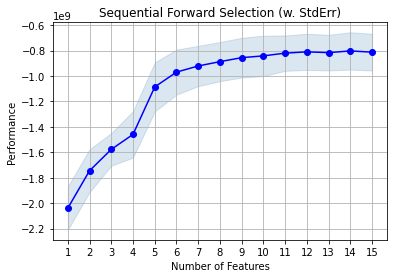

(2, 3, 4, 5, 11, 12, 18, 19, 20, 26, 28, 29, 30, 31)

In [562]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
X_without_encoding = X_train.drop(columns= encoded)

lr = RandomForestRegressor()

sfs = SFS(lr, 
          k_features=(7,15), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_without_encoding, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
sfs.k_feature_idx_

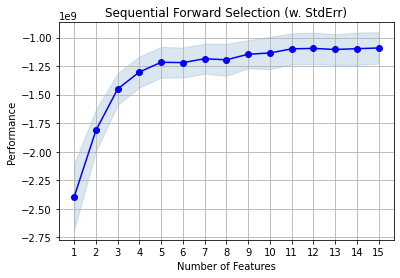

(0, 1, 4, 7, 8, 11, 14, 18, 34, 55, 65, 79, 103, 137, 165)

In [199]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
X_without_encoding = X_train.drop(columns= encoded)

rf = RandomForestRegressor()

sfs = SFS(lr, 
          k_features=(7,15), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
sfs.k_feature_idx_

In [216]:
def selectNoCategorical(X_train):
    indexFeature = sfs.k_feature_idx_
    indexFeature = np.array(indexFeature)
    #Selected features train
    selectedFeacture = X_train[X_train.columns[indexFeature]]

    encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
    FeactureEncoded = X_train[encoded]

    newX_train= selectedFeacture.join(FeactureEncoded, lsuffix='_caller', rsuffix='_other') 
    return newX_train

    encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
    X_without_encoding = X_train.drop(columns= encoded)

newX_train = selectNoCategorical(X_train)
newX_train

def selectNoCategoricalIndex(X_train, index):
    indexFeature = index
    indexFeature = np.array(indexFeature)
    #Selected features train
    selectedFeacture = X_train[X_train.columns[indexFeature]]

    encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
    FeactureEncoded = X_train[encoded]

    newX_train= selectedFeacture.join(FeactureEncoded, lsuffix='_caller', rsuffix='_other') 
    return newX_train

    encoded = X_train.select_dtypes(include='uint8').head().columns.values.tolist()
    X_without_encoding = X_train.drop(columns= encoded)

newX_train = selectNoCategorical(X_train)
newX_train

    



,LotArea,OverallQual,YearRemodAdd,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,MSSubClass_30_caller,MSSubClass_60_caller,LotShape_IR3_caller,Neighborhood_NPkVill_caller,...,SaleType_ConLI_other,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
334,9042,6,1998,943,695,7,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
293,16659,7,1994,1468,795,9,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1433,10261,6,2000,962,830,8,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
628,11606,5,1969,1040,1040,9,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
444,8750,7,1995,933,975,8,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,21930,5,2005,734,1104,7,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
266,11207,6,1997,802,709,8,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
818,8816,6,1971,1052,0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
585,11443,8,2006,2028,0,7,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [201]:
sfs.k_feature_idx_

(0, 1, 4, 7, 8, 11, 14, 18, 34, 55, 65, 79, 103, 137, 165)

In [196]:
#Prueba con arboles

#Entramiento con metodología de validación usando los mejores hiperparametros, datos de entranmiento

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

selectCaract = selectNoCategorical(X_train_test)
ramdonForest(selectCaract, y_train_test)
ramdonForest(X_train_test, y_train_test)

Eficiencia durante el entrenamiento = 0.9018889357405178+-0.008777028347185158
Eficiencia durante la validación = 0.7744655959460225+-0.03420636462442766
Errores train = rmse: 25115.777444417083, mae: 18249.276165958276, mape: 11.631446523439587, r2: 0.9018889357405179
Errores test = rmse: 36993.73443059386, mae: 22959.40458078998, mape: 13.94494717312586, r2: 0.7744655959460225
Eficiencia durante el entrenamiento = 0.9062446255733257+-0.007125325030473708
Eficiencia durante la validación = 0.7777529102739413+-0.028727934778000994
Errores train = rmse: 24563.83551434306, mae: 17728.49983031569, mape: 11.361077666727972, r2: 0.9062446255733257
Errores test = rmse: 36764.908837081006, mae: 22684.080430437592, mape: 13.766103293445813, r2: 0.7777529102739413


In [206]:
#Prueba con arboles - todas las caracteristicas

selectCaract

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

selectCaract = selectNoCategorical(X_train_test)
ramdonForest(selectCaract, y_train_test)
ramdonForest(X_train_test, y_train_test)

KeyError: 'n_estimators'

In [212]:
#SVR - Linear con nuevas caracteristicas

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

selectCaract = selectNoCategorical(X_train_test)
modelSVM('linear', selectCaract, y_train_test)

{'C': 10000.0, 'epsilon': 1}
Eficiencia durante el entrenamiento = 0.8235977973823778+-0.025022189116968657
Eficiencia durante la validación = 0.7084776311405476+-0.011183187696432263
Errores train = rmse: 32785.70428871197, mae: 17839.281582165844, mape: 9.418526278535364, r2: 0.8235977973823777
Errores test = rmse: 42994.626139377826, mae: 28631.430896314458, mape: 16.714358873171214, r2: 0.7084776311405476


In [ ]:
#SVR - RBF con nuevas caracteristicas

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

selectCaract = selectNoCategorical(X_train_test)
modelSVR('rbf', selectCaract, y_train_test)

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from numpy import random
import math
from sklearn import linear_model


random.seed(234567)
Folds = 4
X_train_test, X_val, y_train_test, y_val = train_test_split(Xtrain, Ytrain, test_size=0.10, shuffle=True)

alpha = [0.1, 1, 10, 100, 1000]
fit_intercept=[False,True]
normalize=[False,True]
max_iter=[10, 100, 1000, 10000]

regression_grid = {'alpha':alpha, 'fit_intercept':fit_intercept, 'normalize':normalize, 'max_iter':max_iter}
params = get_params(linear_model.Lasso(), regression_grid, X_val, y_val)

EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
errorsTrain = np.empty(Folds, dtype=object)
errorsVal = np.empty(Folds, dtype=object)

for i in range(0,4):
    X_train, X_test, y_train, y_test = train_test_split(selectCaract, y_train_test, test_size=0.60, shuffle=True)
    regr_freq = ''
    regr_freq = linear_model.Lasso(alpha =params['alpha'], fit_intercept = params['fit_intercept'], normalize =
                                  params['normalize'], max_iter= params['max_iter'])
    regr_freq.fit(X_train, y_train)
    
    #Validación con las muestras de entrenamiento
    Ytrain_pred = regr_freq.predict(X_train)

    #Validación con las muestras de test
    Yest = regr_freq.predict(X_test)

    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[i] = regr_freq.score(X_train, y_train)
    EficienciaVal[i] = regr_freq.score(X_test, y_test)
    errorsTrain[i] = errorMeasure(y_train, Ytrain_pred)
    errorsVal[i] = errorMeasure(y_test, Yest)
    i += 1
    
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))

print('Errores train = rmse: '+ str(np.mean([error['rmse'] for error in errorsTrain])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsTrain]))
     + ', mape: '+ str(np.mean([error['mape'] for error in errorsTrain])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsTrain])))
print('Errores test = rmse: '+ str(np.mean([error['rmse'] for error in errorsVal])) + ', mae: ' + str(np.mean([error['mae'] for error in errorsVal]))
     + ', mape: '+ str(np.mean([error['mape'] for error in errorsVal])) + ', r2: '+ str(np.mean([error['r2'] for error in errorsVal])))


/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5562706544.092499, tolerance: 362044673.5007
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9360810226.978764, tolerance: 382873895.0
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7912908516.192999, tolerance: 373223084.0007
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166801190.511502, tolerance: 57701111.49484536
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168220517.51590133, tolerance: 77234140.09469083
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294269078.18485886, tolerance: 60770253.66885567
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the nu

/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3237116126.288148, tolerance: 60770253.66885567
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2812801546.8945036, tolerance: 57701111.49484536
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3185153011.4537454, tolerance: 77234140.09469083
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the n

/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8638462210.301308, tolerance: 362044673.5007
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6953482874.1697, tolerance: 382873895.0
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8015402268.428393, tolerance: 373223084.0007
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21768461596.108604, tolerance: 382873895.0
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33749417615.584877, tolerance: 373223084.0007
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34566534615.03784, tolerance: 362044673.5007
  positive)
/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

Eficiencia durante el entrenamiento = 0.8497836661833259+-0.020683584065000524
Eficiencia durante la validación = 0.7943999206599961+-0.02985690836243942
Errores train = rmse: 32423.753174480087, mae: 20078.391431849872, mape: 11.785215304494537, r2: 0.8497836661833259
Errores test = rmse: 34293.66425090245, mae: 20647.408229586006, mape: 12.471813037836128, r2: 0.7943999206599961


In [585]:
#Prueba con SVR Lineal

#Desempeño con el conjunto test - Selección forward

kernel, X_train_test, y_train_test

params = KernelLineal
clf = SVR(C = params['C'], epsilon = params['epsilon'], gamma =params['gamma'], kernel = 'linear').fit(newX_train, y_train)
desempeño = clf.score(newX_test, y_test)     
print('Desempeño', desempeño)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Desempeño 0.4343829330683867
Accuracy: 0.81 (+/- 0.05)


## Feature selection - Busqueda secuencial hacia atras

In [ ]:
#Selection Backward
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

encoded = Xtrain.select_dtypes(include='uint8').head().columns.values.tolist()
X_without_encoding = Xtrain.drop(columns= encoded)
lr = RandomForestRegressor()

sfs = SFS(lr, 
          k_features=(1,39), 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_without_encoding, Ytrain)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()
sfs.k_feature_idx_

In [229]:
encoded = Xtrain.select_dtypes(include='uint8').head().columns.values.tolist()
X_without_encoding = Xtrain.drop(columns= encoded)
X_without_encoding

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,548.0,3,3,0,61,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,460.0,3,3,298,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,608.0,3,3,0,42,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,642.0,3,3,0,35,272,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,836.0,3,3,192,84,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,3,3,4,...,460.0,3,3,0,40,0,0,0,8,2007
1456,85.0,13175,6,6,1978,1988,119.0,3,3,4,...,500.0,3,3,349,0,0,0,0,2,2010
1457,66.0,9042,7,9,1941,2006,0.0,5,4,3,...,252.0,3,3,0,60,0,0,2500,5,2010
1458,68.0,9717,5,6,1950,1996,0.0,3,3,3,...,240.0,3,3,366,0,112,0,0,4,2010


In [215]:
#Prueba con arboles
#(1, 2, 3, 4, 5, 11, 12, 17, 18, 19, 26, 27, 29, 32)
index = [1, 2, 3, 4, 5, 11, 12, 17, 18, 19, 26, 27, 29, 32]

#Entramiento con metodología de validación usando los mejores hiperparametros, datos de entranmiento

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

selectCaract = selectNoCategoricalIndex(X_train_test, index)
ramdonForest(selectCaract, y_train_test)
ramdonForest(X_train_test, y_train_test)

KeyError: 'n_estimators'